In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import Normalizer

# Hierarchical-, Agglomerative clustering and dendrograms

## Agglomerative Clustering

1. **Agglomerative clustering** algorithm starts by declaring each point its own cluster.
2. Then it merges the two most similar clusters until some **stopping criterion** is satisfied. 
3. The stopping criterion implemented in scikit-learn is the **number of clusters**
4. Similar clusters are merged until only the specified number of clusters are left.
* Has no **predict** method and cannot make predictions on new data.

![title](img/agg1.png)

**Linkage criterias**: <br>

<font color='green'>**ward**</font> <br>
Default choice, ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized.

<font color='green'>**average**</font><br>
Average linkage merges the two clusters that have the smallest average distance between all their points.

<font color='green'>**complete**</font><br>
Complete linkage (also known as maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

#### Agglomerative Clustering on 3-cluster data:

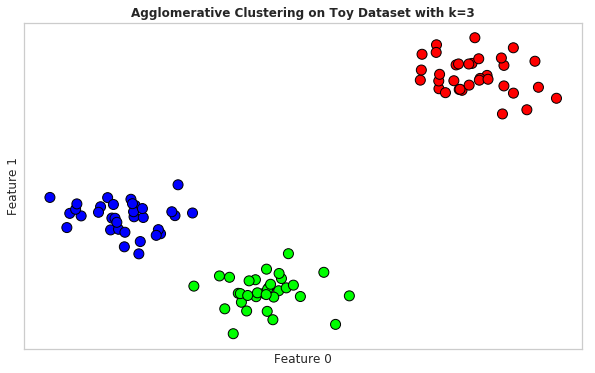

In [12]:
X, y = datasets.make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

rgb = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=labels, s=100, cmap=rgb, edgecolor='black')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Agglomerative Clustering on Toy Dataset with k=3', weight='bold')
plt.xticks(())
plt.yticks(())
plt.show()

The algorithm recovers the clustering perfectly

## Hierarchical Clustering

* Agglomerative Clustering produces **hierarchical clustering**.
* The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belonging to some final cluster.
* Indermediate steps provide ndermediate clusters based on n_clusters value.
* **sklearn** doesn't have built in dendrogram visualization, but **SciPy** does.
* SciPy provides a function that takes a data array X and computes a linkage array, which encodes hierarchical cluster similarities.
* We can then feed this linkage array into the scipy dendrogram function to plot the dendrogram.

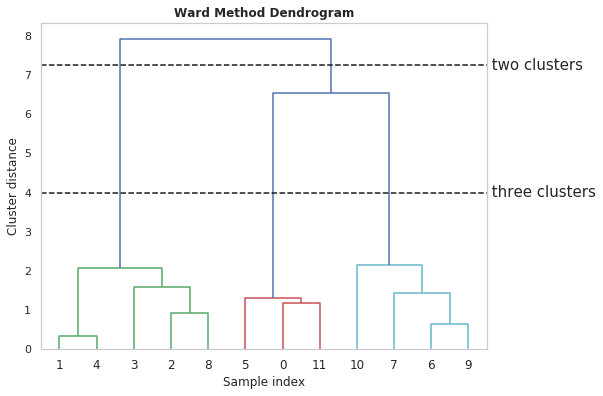

In [30]:
X, y = datasets.make_blobs(random_state=0, n_samples=12)

linkage_array = linkage(X, method='ward') # returns an array that specifies the distances
                        # bridged when performing agglomerative clustering

# plot the dendrogram for the linkage_array
plt.figure(figsize=(8,6))
dendrogram(linkage_array)
plt.grid(False)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title("Ward Method Dendrogram", weight='bold')
plt.show()

* Reading the dendrogram from bottom to top we can see the cluster ordering.
* First points 1 & 4 are joined, ten 6 & 9 ...
* y axis also indicates the distances between merged clusters

### Hierarchical Clustering on Stocks

In [36]:
stocks = pd.read_csv('data/stock_movements.csv')
stocks.head(2)

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.42,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000


In [37]:
# change the first, unnamed column
stocks.rename(columns={'Unnamed: 0': 'company'}, inplace=True)

# gathering the feature variables
X = stocks.drop('company', axis=1).values

# gathering target variables
y = stocks['company'].values

stocks.head(2)

,company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.42,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000


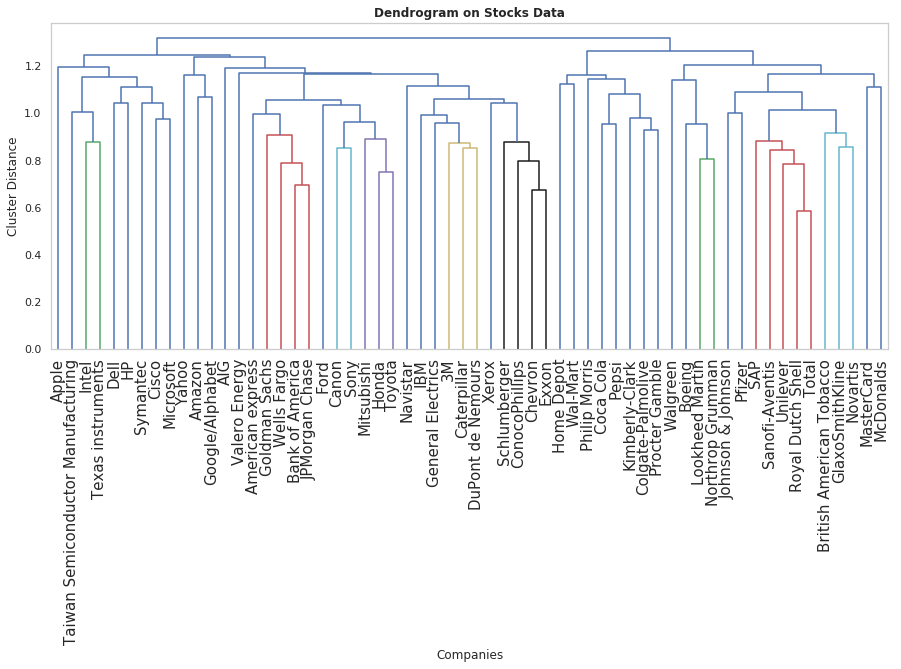

In [44]:
# normalize data
X_normed = Normalizer().fit_transform(X)

# linkage array
linkage_arr = linkage(X_normed, method='complete')

# plot the dendrogram
plt.figure(figsize=(15,6))
dendrogram(linkage_arr, labels=y, leaf_font_size=15)

plt.grid(False)
plt.ylabel('Cluster Distance')
plt.xlabel('Companies')
plt.title('Dendrogram on Stocks Data', weight='bold')
plt.show()